<div class="alert alert-block alert-success">
    <h1 align="center">Telecom Customer Churn Modelling</h1>
    <h4 align="center" >Alireza Esmaeilpour</h4>
    <h6 align="center"><a href="https://alireza-esp.ir/">Website</a></h6>
    <h6 align="center"><a href="https://github.com/Alireza-Esp">Github</a></h6>
    <h6 align="center"><a href="https://www.kaggle.com/alirezaesmaeilpour">Kaggle</a></h6>
</div>

# 🔵 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

# 🔵 Load the data

In [2]:
data = pd.read_csv("https://github.com/Alireza-Esp/Telecom-Customer-Churn-Modelling/raw/refs/heads/main/data/telecom-customer-churn-v2.csv")

In [3]:
data

,City,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,...,Total Extra Data Charges,Total Revenue,Total Refunds,Tenure Months,CLTV,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason
0,Los Angeles,33.964131,-118.272783,Male,No,No,Yes,No,DSL,Yes,...,0,129.09,0.00,2,3239,1,Churned,Yes,Competitor,Competitor made better offer
1,Los Angeles,34.059281,-118.307420,Female,No,Yes,Yes,No,Fiber optic,Yes,...,0,169.89,0.00,2,2701,2,Churned,Yes,Other,Moved
2,Los Angeles,34.048013,-118.293953,Female,No,Yes,Yes,Yes,Fiber optic,Yes,...,0,917.70,0.00,8,5372,3,Churned,Yes,Other,Moved
3,Los Angeles,34.062125,-118.315709,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,...,0,3182.97,0.00,28,5003,3,Churned,Yes,Other,Moved
4,Los Angeles,34.039224,-118.266293,Male,No,Yes,Yes,Yes,Fiber optic,Yes,...,0,7208.47,0.00,49,5340,1,Churned,Yes,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,34.341737,-116.539416,Female,No,No,Yes,No,No,No,...,0,3039.53,19.31,72,5306,5,Stayed,No,NaN,NaN
7028,Adelanto,34.667815,-117.536183,Male,Yes,Yes,Yes,Yes,DSL,Yes,...,0,2807.47,48.23,24,2140,3,Stayed,No,NaN,NaN
7029,Amboy,34.559882,-115.637164,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,...,0,9453.04,45.38,72,5560,4,Stayed,No,NaN,NaN
7030,Angelus Oaks,34.167800,-116.864330,Female,Yes,Yes,No,No phone service,DSL,Yes,...,0,319.21,27.24,11,2793,4,Stayed,No,NaN,NaN


# 🔵 Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7032 non-null   object 
 1   Latitude                           7032 non-null   float64
 2   Longitude                          7032 non-null   float64
 3   Gender                             7032 non-null   object 
 4   Partner                            7032 non-null   object 
 5   Dependents                         7032 non-null   object 
 6   Phone Service                      7032 non-null   object 
 7   Multiple Lines                     7032 non-null   object 
 8   Internet Service                   7032 non-null   object 
 9   Unlimited Data                     7032 non-null   object 
 10  Online Security                    7032 non-null   object 
 11  Online Backup                      7032 non-null   objec

🟣 Remove unhelpful features...

* The "City" feature is logically described with "Longitude" and "Latitude" features. it can be deleted...

In [5]:
data.drop(columns=["City"], inplace=True)

* "Offer" column has a lot of NULL values. it's better to drop it...

In [6]:
data.drop(columns=["Offer"], inplace=True)

* Our dataset has a column named "Number of Referrals". It naturally indicates that does a custemr referred a friend or no.
  so the "Referred a Friend" column can be deleted...

In [7]:
data.drop(columns=["Referred a Friend"], inplace=True)

* "Total Refunds" column is mostly zero. its not usefull. should be deleted...

In [8]:
data.drop(columns=["Total Refunds"], inplace=True)

* the "CLTV" column should to be removed. cause it determined by the company...

In [9]:
data.drop(columns=["CLTV"], inplace=True)

* the "Satisfaction Score" column is strongly correlated with "Churn Label" column that is our target feature;
  and naturally should to be deleted.

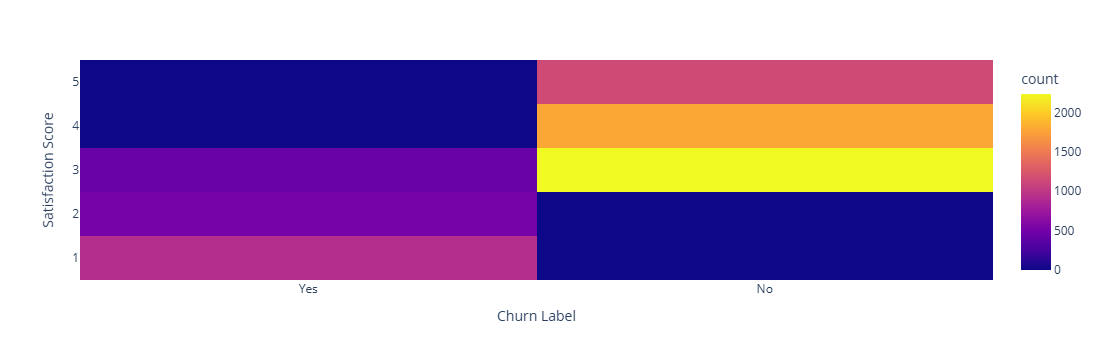

In [10]:
corr = data[["Satisfaction Score", "Churn Label"]]
corr["Churn Label"] = corr["Churn Label"].astype(bool)
corr["Churn Label"] = corr["Churn Label"].astype(int)
corr = corr.corr()
plot = px.density_heatmap(data_frame=data, y="Satisfaction Score", x="Churn Label", width=400)
plot.show()

In [11]:
data.drop(columns=["Satisfaction Score"], inplace=True)

* the "Customer Status", "Churn Category" and "Churn Reason" columns are not important for our target; they should to be deleted...

In [12]:
data.drop(columns=["Customer Status", "Churn Category", "Churn Reason"], inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Latitude                           7032 non-null   float64
 1   Longitude                          7032 non-null   float64
 2   Gender                             7032 non-null   object 
 3   Partner                            7032 non-null   object 
 4   Dependents                         7032 non-null   object 
 5   Phone Service                      7032 non-null   object 
 6   Multiple Lines                     7032 non-null   object 
 7   Internet Service                   7032 non-null   object 
 8   Unlimited Data                     7032 non-null   object 
 9   Online Security                    7032 non-null   object 
 10  Online Backup                      7032 non-null   object 
 11  Device Protection                  7032 non-null   objec

🟣 Split the data to train and test

In [14]:
data_train, data_test = train_test_split(data, test_size=0.2, stratify=data["Churn Label"], random_state=0)

In [15]:
data_train

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
4652,35.013299,-116.834092,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,7,75.75,1929.00,25.26,682.02,23,0,2611.02,27,No
3039,40.689243,-122.037023,Male,Yes,Yes,Yes,No,No,No,No internet service,...,1,18.85,84.20,39.04,156.16,0,0,240.36,4,No
4030,38.966713,-123.586412,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,7,113.60,6292.70,12.91,710.05,21,0,7002.75,55,No
2018,34.238208,-118.550290,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,2,112.25,8041.65,11.66,839.52,28,0,8881.17,72,No
5191,38.121601,-120.133915,Female,No,No,Yes,Yes,DSL,Yes,No,...,0,75.50,5212.65,47.27,3308.90,3,0,8521.55,70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,37.329725,-120.306399,Male,No,No,Yes,No,DSL,No,No,...,0,54.30,195.30,40.15,160.60,19,80,435.90,4,Yes
5214,39.025867,-123.381544,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,4,96.95,5432.20,23.52,1317.12,53,0,6749.32,56,No
4778,36.385818,-119.224243,Female,No,No,Yes,No,No,No,No internet service,...,0,19.60,1441.65,32.99,2243.32,0,0,3684.97,68,No
6380,37.420273,-120.665270,Male,No,Yes,Yes,No,No,No,No internet service,...,0,20.20,50.60,18.43,55.29,0,0,105.89,3,No


In [16]:
data_test

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
1351,34.122671,-118.112911,Male,No,No,Yes,Yes,Fiber optic,Yes,No,...,0,80.20,1217.25,12.08,181.20,5,0,1398.45,15,Yes
631,35.073777,-118.652112,Male,No,No,Yes,Yes,Fiber optic,Yes,No,...,0,99.25,3777.15,31.27,1188.26,85,0,4965.41,38,Yes
3716,36.667794,-121.601306,Male,Yes,Yes,Yes,No,No,No,No internet service,...,1,20.60,926.00,34.94,1537.36,0,0,2463.36,44,No
817,38.685069,-121.543709,Female,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,0,85.95,2628.60,48.95,1566.40,9,0,4195.00,32,Yes
3737,37.352911,-122.093002,Male,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,8,107.20,7317.10,33.37,2302.53,24,0,9619.63,69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,35.342891,-119.064803,Male,No,No,Yes,No,DSL,Yes,No,...,0,45.20,2065.15,24.13,1109.98,16,0,3175.13,46,No
4552,33.215251,-116.536330,Female,Yes,No,Yes,No,No,No,No internet service,...,5,19.05,990.45,46.24,2450.72,0,0,3441.17,53,No
6800,34.026334,-118.474222,Male,No,No,Yes,Yes,Fiber optic,Yes,No,...,0,95.90,6503.20,19.67,1337.56,28,0,7840.76,68,No
6728,34.029043,-118.239504,Female,Yes,No,Yes,No,No,No,No internet service,...,6,20.35,1267.00,31.43,1854.37,0,0,3121.37,59,No


🟣 Handle imbalanced target distribution

In [17]:
data_train_majority = data_train.loc[data_train[data_train["Churn Label"] == "No"].index,:]
data_train_minority = data_train.loc[data_train[data_train["Churn Label"] == "Yes"].index,:]

In [18]:
data_train_majority

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
4652,35.013299,-116.834092,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,7,75.75,1929.00,25.26,682.02,23,0,2611.02,27,No
3039,40.689243,-122.037023,Male,Yes,Yes,Yes,No,No,No,No internet service,...,1,18.85,84.20,39.04,156.16,0,0,240.36,4,No
4030,38.966713,-123.586412,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,7,113.60,6292.70,12.91,710.05,21,0,7002.75,55,No
2018,34.238208,-118.550290,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,2,112.25,8041.65,11.66,839.52,28,0,8881.17,72,No
5191,38.121601,-120.133915,Female,No,No,Yes,Yes,DSL,Yes,No,...,0,75.50,5212.65,47.27,3308.90,3,0,8521.55,70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,33.798266,-118.300237,Female,No,No,Yes,Yes,DSL,Yes,No,...,0,56.30,2364.00,36.47,1495.27,8,0,3859.27,41,No
5214,39.025867,-123.381544,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,4,96.95,5432.20,23.52,1317.12,53,0,6749.32,56,No
4778,36.385818,-119.224243,Female,No,No,Yes,No,No,No,No internet service,...,0,19.60,1441.65,32.99,2243.32,0,0,3684.97,68,No
6380,37.420273,-120.665270,Male,No,Yes,Yes,No,No,No,No internet service,...,0,20.20,50.60,18.43,55.29,0,0,105.89,3,No


In [19]:
data_train_minority

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
69,34.065108,-118.082791,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,1,85.40,401.10,42.29,211.45,16,0,567.18,5,Yes
92,32.741859,-117.090353,Female,No,No,Yes,No,Fiber optic,Yes,No,...,0,80.25,846.00,27.10,271.00,11,0,1117.00,10,Yes
1646,38.937060,-123.118111,Male,No,No,Yes,No,DSL,No,No,...,0,46.05,80.35,29.69,59.38,52,10,149.73,2,Yes
995,34.567058,-117.362329,Male,No,No,Yes,Yes,Fiber optic,Yes,No,...,0,101.40,3496.30,39.69,1389.15,25,0,4885.45,35,Yes
981,34.278967,-116.773825,Male,No,Yes,Yes,No,DSL,Yes,Yes,...,0,49.35,219.65,26.04,104.16,27,0,323.81,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,37.674002,-122.076796,Male,No,No,Yes,No,No,No,No internet service,...,0,19.25,112.30,9.14,63.98,0,0,176.28,7,Yes
313,37.671806,-121.007575,Male,Yes,No,Yes,No,Fiber optic,Yes,No,...,1,69.00,1149.65,44.97,764.49,11,0,1914.14,17,Yes
566,35.824572,-116.274755,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,0,94.80,4837.60,44.77,2283.27,58,0,7120.87,51,Yes
574,33.827690,-117.102244,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,1,74.40,527.90,8.92,62.44,17,0,557.88,7,Yes


In [20]:
data_train_minority_upsampled = resample(
    data_train_minority, 
    replace=True,
    n_samples=len(data_train_majority),
    random_state=0
)

In [21]:
data_train_minority_upsampled

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
67,34.042286,-117.756106,Male,No,No,No,No phone service,DSL,Yes,No,...,0,24.80,24.80,0.00,0.00,29,0,24.80,1,Yes
773,40.372532,-123.525626,Female,Yes,Yes,No,No phone service,DSL,No,No,...,1,31.00,95.05,0.00,0.00,19,20,115.05,3,Yes
568,34.084909,-117.258107,Female,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,1,86.15,2745.70,14.34,473.22,28,0,3218.92,33,Yes
1844,32.741499,-117.127409,Female,Yes,No,Yes,No,Fiber optic,Yes,Yes,...,1,101.25,2754.45,45.82,1237.14,13,0,3991.59,27,Yes
1317,34.052917,-118.255178,Female,No,No,Yes,No,No,No,No internet service,...,0,19.85,108.05,6.17,30.85,0,0,138.90,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,33.707483,-117.200006,Female,No,No,Yes,No,Fiber optic,Yes,No,...,0,85.15,2555.90,9.34,280.20,8,0,2836.10,30,Yes
420,41.924174,-123.260788,Male,No,No,Yes,No,Fiber optic,Yes,No,...,0,90.25,2755.35,30.06,901.80,19,0,3657.15,30,Yes
538,32.961064,-117.134917,Male,Yes,No,Yes,No,Fiber optic,Yes,Yes,...,1,90.60,6056.15,30.75,2060.25,5,0,8116.40,67,Yes
430,38.636052,-119.489162,Male,No,No,Yes,No,DSL,Yes,No,...,0,45.05,770.60,40.93,695.81,2,0,1466.41,17,Yes


In [22]:
data_train = pd.concat(
    [data_train_majority, data_train_minority_upsampled],
    axis=0
)

In [23]:
data_train

,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,Online Security,...,Number of Referrals,Monthly Charges,Total Charges,Avg Monthly Long Distance Charges,Total Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Total Revenue,Tenure Months,Churn Label
4652,35.013299,-116.834092,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,7,75.75,1929.00,25.26,682.02,23,0,2611.02,27,No
3039,40.689243,-122.037023,Male,Yes,Yes,Yes,No,No,No,No internet service,...,1,18.85,84.20,39.04,156.16,0,0,240.36,4,No
4030,38.966713,-123.586412,Male,Yes,No,Yes,Yes,Fiber optic,Yes,No,...,7,113.60,6292.70,12.91,710.05,21,0,7002.75,55,No
2018,34.238208,-118.550290,Male,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,...,2,112.25,8041.65,11.66,839.52,28,0,8881.17,72,No
5191,38.121601,-120.133915,Female,No,No,Yes,Yes,DSL,Yes,No,...,0,75.50,5212.65,47.27,3308.90,3,0,8521.55,70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,33.707483,-117.200006,Female,No,No,Yes,No,Fiber optic,Yes,No,...,0,85.15,2555.90,9.34,280.20,8,0,2836.10,30,Yes
420,41.924174,-123.260788,Male,No,No,Yes,No,Fiber optic,Yes,No,...,0,90.25,2755.35,30.06,901.80,19,0,3657.15,30,Yes
538,32.961064,-117.134917,Male,Yes,No,Yes,No,Fiber optic,Yes,Yes,...,1,90.60,6056.15,30.75,2060.25,5,0,8116.40,67,Yes
430,38.636052,-119.489162,Male,No,No,Yes,No,DSL,Yes,No,...,0,45.05,770.60,40.93,695.81,2,0,1466.41,17,Yes


In [24]:
data_train["Churn Label"].value_counts()

Churn Label
No     4130
Yes    4130
Name: count, dtype: int64

🟣 Split data to X_train, y_train, X_test, y_test

In [25]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

In [26]:
X_train = X_train.reset_index().drop(columns=["index"])
y_train = y_train.reset_index().drop(columns=["index"])

🟣 Split X_train to X_train_cat and X_train_num

In [27]:
categorical_cols = []
numerical_cols = []

for i in X_train.columns:
    if X_train[i].dtype == "object":
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)

In [28]:
X_train_cat = X_train[categorical_cols]
X_train_num = X_train[numerical_cols]

🟣 Encoding

In [29]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

OneHotEncoder()

In [30]:
with open(file="../objects/encoder.pkl", mode="wb") as encoder_file_path:
    pk.dump(obj=encoder, file=encoder_file_path)

In [31]:
X_train_cat = pd.DataFrame(encoder.transform(X_train_cat).toarray())

In [32]:
X_train_cat

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8256,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8257,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8258,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


🟣 Scaling

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [34]:
with open(file="../objects/scaler.pkl", mode="wb") as scaler_file_path:
    pk.dump(obj=scaler, file=scaler_file_path)

In [35]:
X_train_num = pd.DataFrame(scaler.transform(X_train_num))

In [36]:
X_train_num

,0,1,2,3,4,5,6,7,8,9,10
0,0.261258,0.738715,0.636364,0.572139,0.220425,0.505301,0.191325,0.270588,0.0,0.216561,0.366197
1,0.864677,0.224005,0.090909,0.005970,0.007547,0.780956,0.043807,0.000000,0.0,0.018311,0.042254
2,0.681552,0.070729,0.636364,0.948756,0.723967,0.258252,0.199188,0.247059,0.0,0.583825,0.760563
3,0.178857,0.568937,0.181818,0.935323,0.925785,0.233247,0.235508,0.329412,0.0,0.740911,1.000000
4,0.591707,0.412274,0.000000,0.569652,0.599336,0.945589,0.928236,0.035294,0.0,0.710837,0.971831
...,...,...,...,...,...,...,...,...,...,...,...
8255,0.122434,0.702516,0.000000,0.665672,0.292765,0.186837,0.078604,0.094118,0.0,0.235383,0.408451
8256,0.995965,0.102942,0.000000,0.716418,0.315780,0.601320,0.252979,0.223529,0.0,0.304045,0.408451
8257,0.043081,0.708955,0.090909,0.719900,0.696671,0.615123,0.577956,0.058824,0.0,0.676956,0.929577
8258,0.646399,0.476057,0.000000,0.266667,0.086753,0.818764,0.195193,0.023529,0.0,0.120841,0.225352


🟣 Integrating

In [37]:
X_train_final = pd.concat([X_train_cat, X_train_num], axis=1)
X_train_final.columns = list(range(len(X_train_final.columns)))

In [38]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.738715,0.636364,0.572139,0.220425,0.505301,0.191325,0.270588,0.0,0.216561,0.366197
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.224005,0.090909,0.005970,0.007547,0.780956,0.043807,0.000000,0.0,0.018311,0.042254
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.070729,0.636364,0.948756,0.723967,0.258252,0.199188,0.247059,0.0,0.583825,0.760563
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.568937,0.181818,0.935323,0.925785,0.233247,0.235508,0.329412,0.0,0.740911,1.000000
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.412274,0.000000,0.569652,0.599336,0.945589,0.928236,0.035294,0.0,0.710837,0.971831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.702516,0.000000,0.665672,0.292765,0.186837,0.078604,0.094118,0.0,0.235383,0.408451
8256,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.102942,0.000000,0.716418,0.315780,0.601320,0.252979,0.223529,0.0,0.304045,0.408451
8257,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.708955,0.090909,0.719900,0.696671,0.615123,0.577956,0.058824,0.0,0.676956,0.929577
8258,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.476057,0.000000,0.266667,0.086753,0.818764,0.195193,0.023529,0.0,0.120841,0.225352


In [ ]:
# Unused funcs for now

In [ ]:
def reset_dataframe_index(data: pd.DataFrame):
    data = data.reset_index().drop(columns=["index"])
    return data

In [ ]:
def get_categorical_columns(data: pd.DataFrame):
    cat_cols = []
    for i in data.columns:
        if data[i].dtype == "object":
            cat_cols.append(i)
    return cat_cols

In [ ]:
def get_numerical_columns(data: pd.DataFrame):
    num_cols = []
    for i in data.columns:
        if data[i].dtype != "object":
            num_cols.append(i)
    return num_cols

In [ ]:
def encode_cat_columns(data: pd.DataFrame, columns: list):
    encoder = OneHotEncoder()
    encoder.fit(data[columns])
    data = pd.DataFrame(encoder.transform(data[columns]).toarray())
    return data

In [ ]:
def scale_num_columns(data: pd.DataFrame, columns: list):
    scaler = MinMaxScaler()
    scaler.fit(data[columns])
    data = pd.DataFrame(scaler.transform(data[columns]))
    return data

In [ ]:
def integrate_cat_num_dataframe(cat_dataframe: pd.DataFrame, num_dataframe: pd.DataFrame):
    integrated_data = pd.concat([cat_dataframe, num_dataframe], axis=1)
    integrated_data.columns = list(range(len(integrated_data.columns)))
    return integrated_data

# 🔵 Save the data

In [39]:
data_file_paths = [
    "../data/X_train.csv",
    "../data/y_train.csv",
    "../data/X_test.csv",
    "../data/y_test.csv"
]
data_objs = [
    X_train_final,
    y_train,
    X_test,
    y_test
]

In [40]:
for data_file_path, obj in zip(data_file_paths, data_objs):
    with open(file=data_file_path, mode="w", encoding="utf-8") as file_path:
        obj.to_csv(path_or_buf=file_path, index=False, lineterminator="\n")